<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hiperparametry to parametry które nie są bezpośrednio znane w modelu np.

- criterion: {'gini', 'entropy'}
- max_depth: int
- min_sample_split: int or float
- min_sample_leaf: int or float

### Zalety i wady drzew decyzyjnych.
#### Zalety:
 - szybkie i łatwe do zbudowania
 - wymagają niewielkich eksperymentów 
 - są bardzo krzepkie 
 - łatwe do zrozumienia i interpretacji
 - nie wymagają skomplikowanego przygotowania danych
 - portafią sobie radzić zarówno z danymi kategorycznymi jak i numerycznymi
 - obsługują dane wielowymiarowe i duże zbiory danych

#### Wady:
- niestabilność (niewielka zmiana danych wejściowych może powodować zmiany    w   budowie całego drzewa   
- złożoność
- sklonne do szybkiego przeuczenia

  Lasy losowe uśredniają prognozy z wielu drzew i pozwalają ograniczyć niestabilność.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale = 1.3)
np.random.seed(42)


In [66]:
raw_data = load_iris()
all_data = raw_data.copy()

print(all_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [67]:
data = all_data['data']
target = all_data['target']
feature_names = [name.replace(" ", "_")[:-5] for name in all_data['feature_names']]

target_names = all_data['target_names']

In [68]:
print(f'Liczba zmiennych: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych: {feature_names}')
print(f'Nazwy kosaćca: {target_names}')

Liczba zmiennych: 150
Kształt danych: (150, 4)
Nazwy zmiennych: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kosaćca: ['setosa' 'versicolor' 'virginica']


In [69]:
df = pd.DataFrame(np.c_[data, target], columns = feature_names + ['target'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


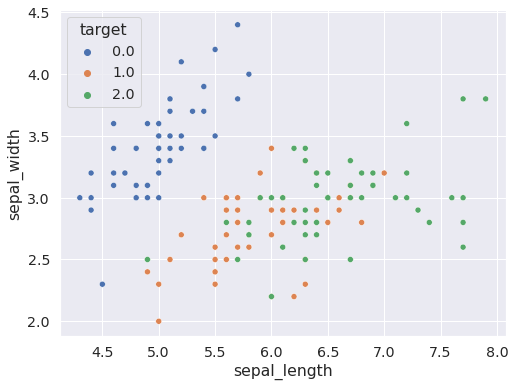

In [70]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot('sepal_length', 'sepal_width', hue = 'target', data = df, legend = 'full', palette = sns.color_palette()[:3])

In [71]:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [72]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]

In [73]:
target = data.pop('target')
data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [74]:
data = data.values
target = target.values.astype('int16')

In [75]:
from sklearn.tree import DecisionTreeClassifier
classifier =  DecisionTreeClassifier(max_depth = 1)

classifier.fit(data, target)
acc = classifier.score(data, target)

from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


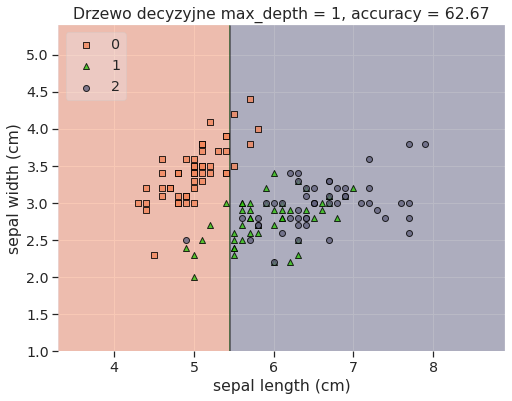

In [76]:
colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
plt.figure(figsize = (8, 6))
plot_decision_regions(data, target, classifier, legend = 2, colors = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne max_depth = 1, accuracy = {acc*100:.2f}')
plt.show()

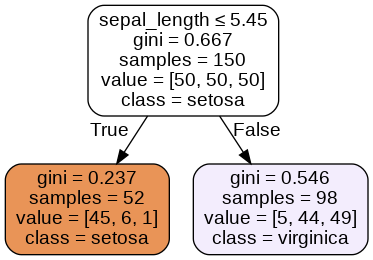

In [78]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier,
                out_file = dot_data, 
                feature_names = feature_names[:2],
                class_names = target_names,
                special_characters = True,
                rounded = True, 
                filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write('graph.png')
Image(graph.create_png(), width = 300)

In [82]:
def make_tree(max_depth = 1):
  classifier =  DecisionTreeClassifier(max_depth = max_depth)
  classifier.fit(data, target)
  dot_data = StringIO()
  
  export_graphviz(classifier,
                out_file = dot_data, 
                feature_names = feature_names[:2],
                class_names = target_names,
                special_characters = True,
                rounded = True, 
                filled = True)

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write('graph.png')

  acc = classifier.score(data, target)

  colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
  
  plt.figure(figsize = (8, 6))
  ax = plot_decision_regions(data, target, classifier, legend = 0, colors = colors)
  handless, labels = ax.get_legend_handles_labels()
  ax.legend(handless, ['setosa', 'versicolor', 'virginica'], framealpha = 0.3)
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.title(f'Drzewo decyzyjne max_depth = {max_depth}, accuracy = {acc*100:.2f}')



  return Image(graph.create_png(), width = 200 + max_depth*120)
  




/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


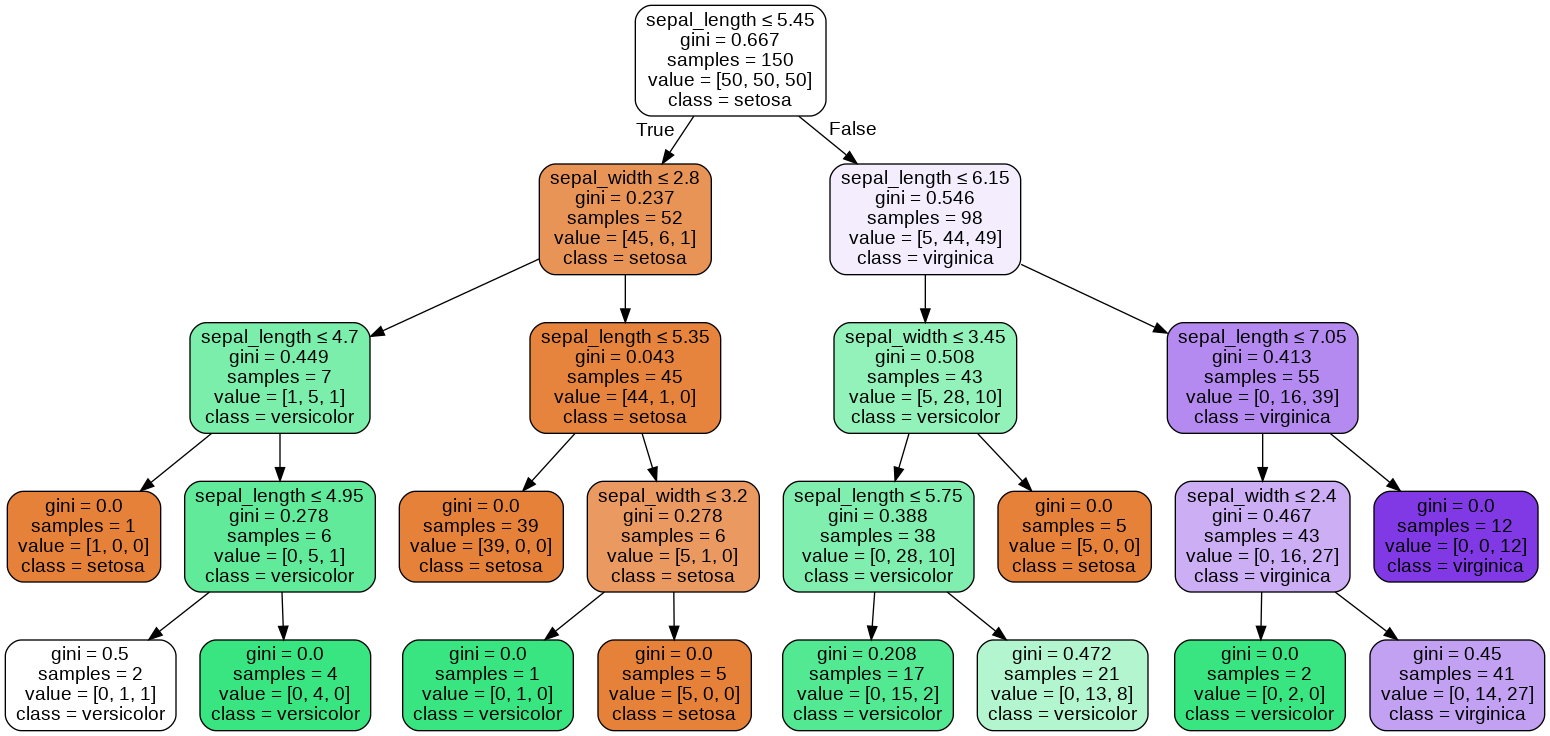

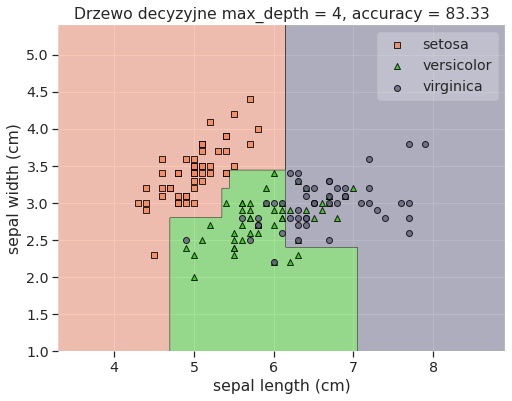

In [83]:
make_tree(4)